### purpose

the purpose of this notebook is for you to practice executing python and problem solving along the way.

this notebook will focus on using strings, lists, dictionaries, and dataframes.

you will get more out of this notebook if you are not copying/pasting, and instead writing out the commands manually

In [1]:
# the libraries you'll need
import pandas as pd
import session_info
import seaborn as sns
import time

In [2]:
# print the date and time
time.strftime('%c %Z')

'Tue Jul 16 11:59:35 2024 EDT'

In [3]:
# show all of the package versions that you've loaded into this session
session_info.show()

# load Dataset 1

In [4]:
# exercise data
exdata = sns.load_dataset('exercise')

exdata.pop('Unnamed: 0') # remove unnecessary column

exdata

id     diet  pulse    time     kind
0    1  low fat     85   1 min     rest
1    1  low fat     85  15 min     rest
2    1  low fat     88  30 min     rest
3    2  low fat     90   1 min     rest
4    2  low fat     92  15 min     rest
..  ..      ...    ...     ...      ...
85  29   no fat    135  15 min  running
86  29   no fat    130  30 min  running
87  30   no fat     99   1 min  running
88  30   no fat    111  15 min  running
89  30   no fat    150  30 min  running

[90 rows x 5 columns]

### Excercise 1 - explore data

In [5]:
# how many columns does the data have?
len(exdata.columns)

5

In [6]:
# iterate the column names using a for loop; each iteration print the column name
for column in exdata.columns:
    print(column)

id
diet
pulse
time
kind


In [7]:
# iterate the column names using a for loop; 
    # each iteration print a string that has the column name as well as additional words (like a short sentence)
for column in exdata.columns:
    print(column, 'is the column name')

id is the column name
diet is the column name
pulse is the column name
time is the column name
kind is the column name


In [8]:
# iterate the column names using a for loop; 
    # each iteration print a string that has the column name, and print the following on the same line as the column name:
        # either 1) the columns unique entries (eg for column dtype is an object, str, etc) or 
        # 2) the column's 74th quantile (if dtype is a float or int)
for column in exdata.columns:
    if exdata[column].dtype in [float, int]:
        print(column, exdata[column].quantile(0.74))
    else:
        print(column, exdata[column].unique())

id 22.86
diet ['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']
pulse 103.0
time ['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']
kind ['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']


In [9]:
# how many rows does the data have?
len(exdata.index)

90

In [10]:
# extract the number of rows and columns from `exdata` at the same time 
    # hint: there is a single method that will return both
exdata.shape

(90, 5)

### Excercise 2 - make some figures

<Axes: title={'center': 'pulse'}, xlabel='diet'>

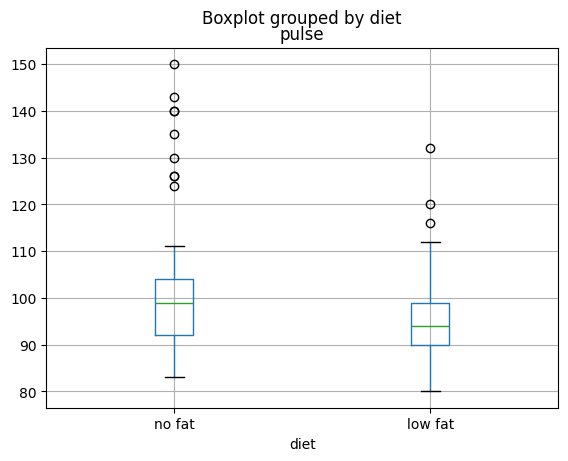

In [11]:
# use boxplots to compare the Pulse of individuals on either a 'no fat' or a 'low fat' Diet.
exdata.boxplot(by='diet', column='pulse')

# load Dataset 2

In [12]:
mri_data = sns.load_dataset('fmri')

mri_data

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

### Exercise 3 - sort data

In [13]:
# sort the dataframe, sorted first by values in the subject column, then by values in the timepoint column
    # hint: the sorting is a heirarchy, and it happens all at once (so not sequential commands, just a single method)

mri_data.sort_values(by=['subject', 'timepoint'])

subject  timepoint event    region    signal
67        s0          0  stim   frontal -0.021452
521       s0          0  stim  parietal -0.039327
932       s0          0   cue   frontal  0.007766
1063      s0          0   cue  parietal -0.006899
251       s0          1  stim  parietal -0.035735
...      ...        ...   ...       ...       ...
817       s9         17   cue  parietal -0.036362
5         s9         18  stim  parietal -0.103513
519       s9         18  stim   frontal -0.009959
722       s9         18   cue   frontal -0.000643
803       s9         18   cue  parietal -0.051040

[1064 rows x 5 columns]

In [14]:
# now store the sorted data in a new object called mri_sorted; 
    # display the first 15 lines of the mri_sorted dataframe
mri_sorted = mri_data.sort_values(by=['subject', 'timepoint'])

mri_sorted.head(15)

subject  timepoint event    region    signal
67        s0          0  stim   frontal -0.021452
521       s0          0  stim  parietal -0.039327
932       s0          0   cue   frontal  0.007766
1063      s0          0   cue  parietal -0.006899
251       s0          1  stim  parietal -0.035735
280       s0          1  stim   frontal -0.021054
624       s0          1   cue   frontal  0.016440
675       s0          1   cue  parietal  0.000300
237       s0          2  stim  parietal  0.009642
294       s0          2  stim   frontal -0.009038
728       s0          2   cue  parietal  0.033220
994       s0          2   cue   frontal  0.024296
225       s0          3  stim  parietal  0.086399
308       s0          3  stim   frontal  0.026727
595       s0          3   cue  parietal  0.085040

### Exercise 4 - create a boxplot by grouping data

<Axes: title={'center': 'signal'}, xlabel='event'>

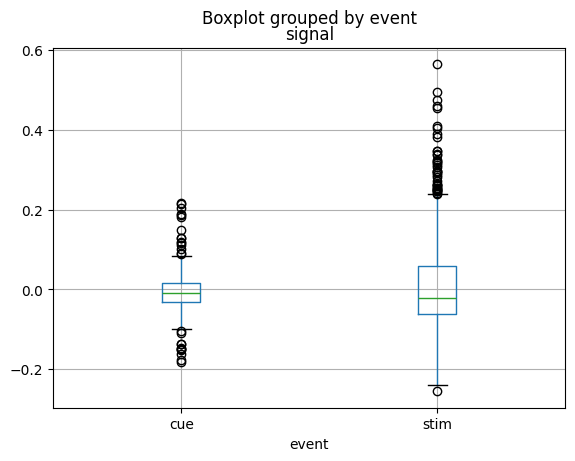

In [15]:
# make a figure with boxplots that shows variation in signal across each unique event
    # (it doesn't matter if you use sorted data or not)
mri_data.boxplot(by='event', column='signal')

<Axes: title={'center': 'signal'}, xlabel='region'>

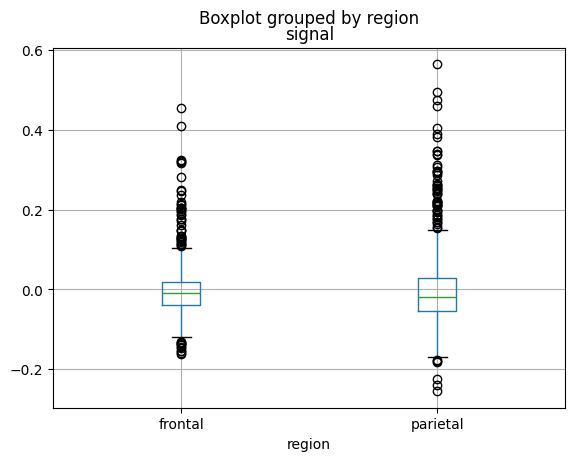

In [16]:
# make a figure with boxplot that shows variation in signal across each unique region
mri_data.boxplot(by='region', column='signal')

<Axes: title={'center': 'signal'}, xlabel='subject'>

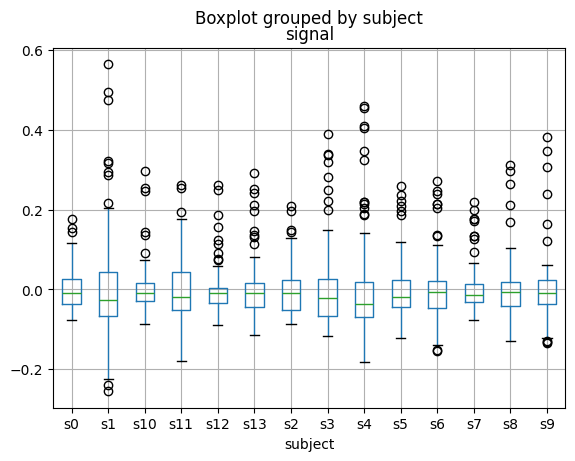

In [17]:
# create a boxplot that shows variation in signal for each participant
mri_data.boxplot(column='signal', by='subject')

# load Dataset 3

In [18]:
stockdata = sns.load_dataset('dowjones')

stockdata

Date   Price
0   1914-12-01   55.00
1   1915-01-01   56.55
2   1915-02-01   56.00
3   1915-03-01   58.30
4   1915-04-01   66.45
..         ...     ...
644 1968-08-01  883.72
645 1968-09-01  922.80
646 1968-10-01  955.47
647 1968-11-01  964.12
648 1968-12-01  965.39

[649 rows x 2 columns]

### Excercise 5 - make a line graph

<Axes: xlabel='Date'>

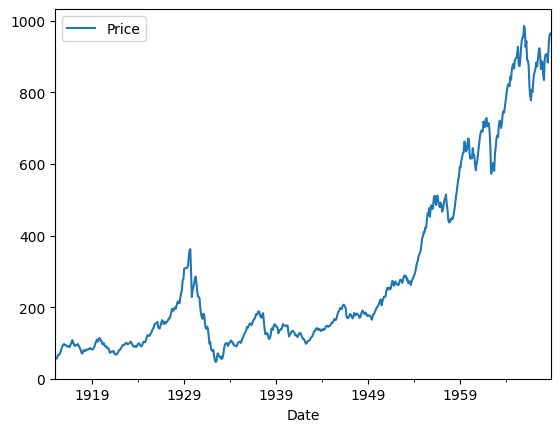

In [19]:
# create a line graph that shows how the Price changes over time
stockdata.plot(x='Date', y='Price')

# load Dataset 4

In [20]:
# load
g = sns.load_dataset('glue')

g

Model  Year      Encoder  Task  Score
0         ERNIE  2019  Transformer  CoLA   75.5
1            T5  2019  Transformer  CoLA   71.6
2       RoBERTa  2019  Transformer  CoLA   67.8
3          BERT  2018  Transformer  CoLA   60.5
4   BiLSTM+ELMo  2018         LSTM  CoLA   32.1
..          ...   ...          ...   ...    ...
59         BERT  2018  Transformer   RTE   70.1
60  BiLSTM+ELMo  2018         LSTM   RTE   57.4
61  BiLSTM+CoVe  2017         LSTM   RTE   52.7
62  BiLSTM+Attn  2017         LSTM   RTE   58.4
63       BiLSTM  2017         LSTM   RTE   57.4

[64 rows x 5 columns]

In [21]:
# reformat data so that each unique model is now a column, and the entries are from the Score columns
glue_pivot = pd.pivot_table(
    g,
    values='Score',  # which column we want as entries?
    columns='Model',  # which column's categories do we want as new columns?
    index=['Year', 'Encoder', 'Task']  # which columns to keep grouped with Score
    
).rename_axis(None, axis=1) # the pivot table names the column list "Model" (since it's a list of models), 
                                # so I just remove that to avoid confusion

glue_pivot.head()

BERT  BiLSTM  BiLSTM+Attn  BiLSTM+CoVe  BiLSTM+ELMo  ERNIE  \
Year Encoder Task                                                               
2017 LSTM    CoLA   NaN    11.6         18.6         18.5          NaN    NaN   
             MNLI   NaN    65.6         67.6         65.4          NaN    NaN   
             MRPC   NaN    81.8         83.9         78.7          NaN    NaN   
             QNLI   NaN    74.6         74.3         70.8          NaN    NaN   
             QQP    NaN    62.5         60.1         60.6          NaN    NaN   

                   RoBERTa  T5  
Year Encoder Task               
2017 LSTM    CoLA      NaN NaN  
             MNLI      NaN NaN  
             MRPC      NaN NaN  
             QNLI      NaN NaN  
             QQP       NaN NaN

In [22]:
# our row names are a multi index, which is nested by Year, Encoder then Task
glue_pivot.index[:5]

MultiIndex([(2017, 'LSTM', 'CoLA'),
            (2017, 'LSTM', 'MNLI'),
            (2017, 'LSTM', 'MRPC'),
            (2017, 'LSTM', 'QNLI'),
            (2017, 'LSTM',  'QQP')],
           names=['Year', 'Encoder', 'Task'])

In [23]:
# convert the indices to entries in columns 
glue_data = glue_pivot.reset_index()

# this dataframe has NAN (blanks) because not all Models had Scores for every Year-Encoder-Task combination
glue_data.head()

Year Encoder  Task  BERT  BiLSTM  BiLSTM+Attn  BiLSTM+CoVe  BiLSTM+ELMo  \
0  2017    LSTM  CoLA   NaN    11.6         18.6         18.5          NaN   
1  2017    LSTM  MNLI   NaN    65.6         67.6         65.4          NaN   
2  2017    LSTM  MRPC   NaN    81.8         83.9         78.7          NaN   
3  2017    LSTM  QNLI   NaN    74.6         74.3         70.8          NaN   
4  2017    LSTM   QQP   NaN    62.5         60.1         60.6          NaN   

   ERNIE  RoBERTa  T5  
0    NaN      NaN NaN  
1    NaN      NaN NaN  
2    NaN      NaN NaN  
3    NaN      NaN NaN  
4    NaN      NaN NaN

### Excercise 6

<Axes: >

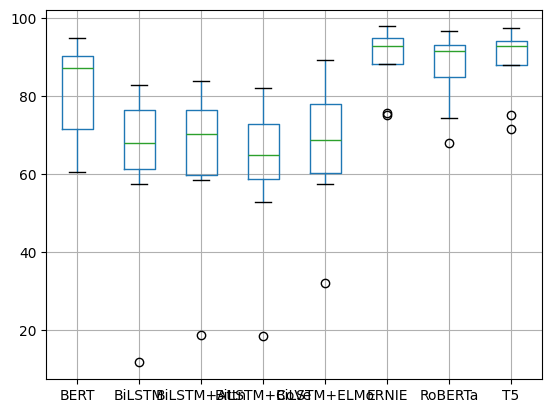

In [24]:
# make a figure with boxplots of scores for each model
glue_pivot.boxplot(column=glue_data.columns[3:].tolist())

# Dataset 5

In [25]:
cardata = sns.load_dataset('mpg')

cardata.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

### Exercise 7

<Axes: xlabel='cylinders', ylabel='horsepower'>

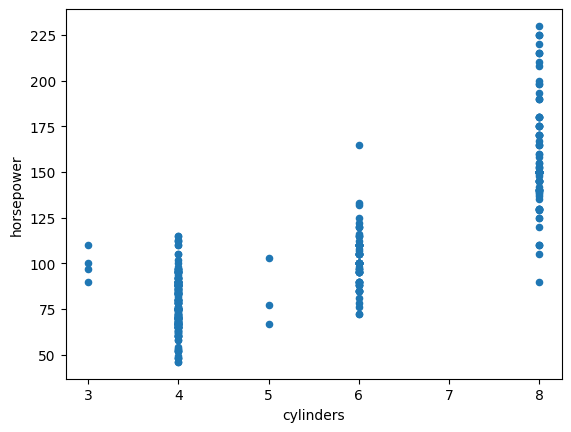

In [26]:
# plot the relationship between the number of cylinders and the total horsepower
cardata.plot(kind='scatter', x='cylinders', y='horsepower')

<Axes: xlabel='weight', ylabel='mpg'>

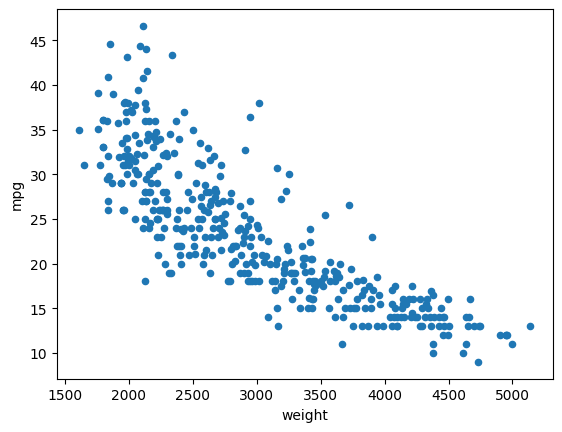

In [27]:
# plot the relationship between the number of weight and the mpg
cardata.plot(kind='scatter', x='weight', y='mpg')

<Axes: title={'center': 'mpg'}, xlabel='model_year'>

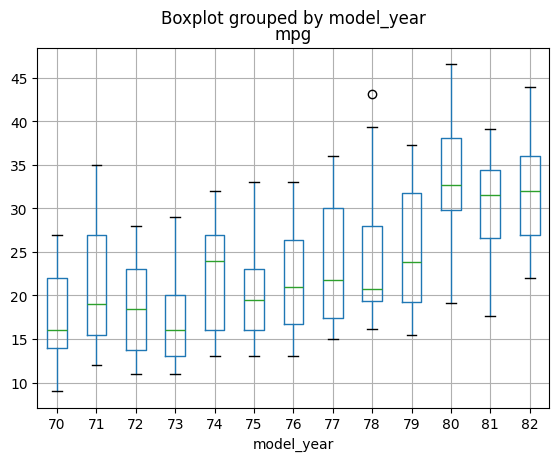

In [28]:
# create a boxplot to show how mpg has improved over time
cardata.boxplot(by='model_year', column='mpg')

### bonus

I have not shown you how to answer these questions, but I've shown you a few ways of finding out how you might, or have shown you some of the intermediate steps to solve these problems ...

In [29]:
# what is the Pearson correlation coefficient between the weight and mpg of these cars?
    # hint: it's a pd.Series method
cardata['weight'].corr(cardata['mpg'])

-0.8317409332443352

In [30]:
# what is the Spearman correlation coefficient between the weight and mpg of these cars?
cardata['weight'].corr(cardata['mpg'], method='spearman')

-0.8749473981990712

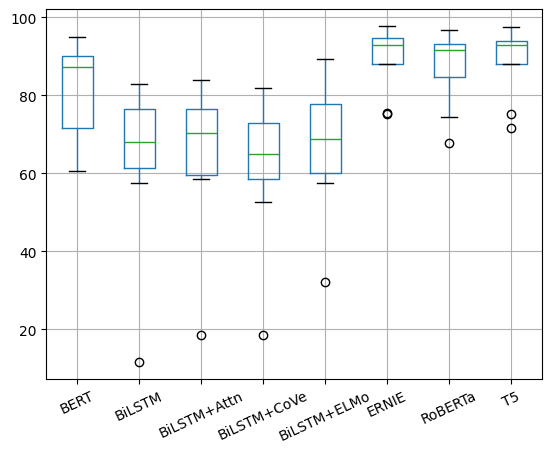

In [31]:
# figure out how to rotate the x-axis labels to 45* in figure from Exercise 6 so they do not overlap
    # there are several ways to do this
    # hint: you may want to store the Axes that's retured from the pd.DataFrame.boxplot method
ax = glue_pivot.boxplot(column=glue_data.columns[3:].tolist())

ax.tick_params(axis='x', labelrotation=25)

In [32]:
# print the average mpg for each model year in `cardata`.
for model_year in cardata['model_year'].unique():
    df = cardata[cardata['model_year'] == model_year]
    print(model_year, df['mpg'].mean())

70 17.689655172413794
71 21.25
72 18.714285714285715
73 17.1
74 22.703703703703702
75 20.266666666666666
76 21.573529411764707
77 23.375
78 24.061111111111114
79 25.09310344827585
80 33.69655172413793
81 30.334482758620695
82 31.70967741935484


In [33]:
# using the same (or v similar) code used to print the average mpg for each model year in `cardata`,
    # add additional code to create a dictionary where the key is model year and the value is the average mpg

year_mpg = {}
for model_year in cardata['model_year'].unique():
    df = cardata[cardata['model_year'] == model_year]
    year_mpg[model_year] = df['mpg'].mean()

year_mpg

{70: 17.689655172413794,
 71: 21.25,
 72: 18.714285714285715,
 73: 17.1,
 74: 22.703703703703702,
 75: 20.266666666666666,
 76: 21.573529411764707,
 77: 23.375,
 78: 24.061111111111114,
 79: 25.09310344827585,
 80: 33.69655172413793,
 81: 30.334482758620695,
 82: 31.70967741935484}